In [1]:
import sys
print(sys.path)

['/home/hassan/selcon-classification', '/home/hassan/.conda/envs/ldm/lib/python38.zip', '/home/hassan/.conda/envs/ldm/lib/python3.8', '/home/hassan/.conda/envs/ldm/lib/python3.8/lib-dynload', '', '/home/hassan/.local/lib/python3.8/site-packages', '/home/hassan/.conda/envs/ldm/lib/python3.8/site-packages', '/home/hassan/stable-diffusion/src/taming-transformers', '/home/hassan/stable-diffusion', '/home/hassan/stable-diffusion/src/clip', '/home/hassan/segmentation_in_diffusion']


In [2]:
sys.path.append("/home/hassan/selcon-classification/SELCON")

In [3]:
from SELCON.datasets import load_def_data, get_data
from SELCON.logistic import Regression

/home/hassan/.conda/envs/ldm/lib/python3.8/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: /home/hassan/.conda/envs/ldm/lib/python3.8/site-packages/torchvision/image.so: undefined symbol: _ZNK3c1010TensorImpl36is_contiguous_nondefault_policy_implENS_12MemoryFormatE
  warn(f"Failed to load image Python extension: {e}")


Using Device: cuda


In [4]:
import numpy as np
X=np.load('./Dataset/features.npy')
y=np.load('./Dataset/labels.npy')

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X,y, test_size=0.20, random_state=42)

NameError: name 'X' is not defined

In [4]:
(X_train,y_train),(X_val,y_val),(X_test,y_test)=load_def_data('Custom_Data',class_sep=3.0)

In [8]:
X_train.shape

torch.Size([20800, 10])

In [9]:
y_train.shape

torch.Size([20800])

In [11]:
X_val.shape

torch.Size([2080, 10])

In [15]:
y_train.shape

torch.Size([80])

In [5]:
reg = Regression()

# X_trn, X_val, Y_trn, Y_val = get_data(X_train, X_val, y_train, y_val)
reg.train_model_fair(X_train, y_train, X_val, y_val, fraction = 0.1)
# subset_idxs = reg.return_subset()

# X_sub = X_trn[subset_idxs]
# y_sub = Y_trn[subset_idxs]

Budget, fraction and N: 8 0.1 80
starting Pre compute
val_out shape  torch.Size([16])
targets shape  torch.Size([16])
val_out shape  torch.Size([16])
targets shape  torch.Size([16])
val_out shape  torch.Size([16])
targets shape  torch.Size([16])
val_out shape  torch.Size([16])
targets shape  torch.Size([16])
val_out shape  torch.Size([16])
targets shape  torch.Size([16])
val_out shape  torch.Size([16])
targets shape  torch.Size([16])
val_out shape  torch.Size([16])
targets shape  torch.Size([16])
val_out shape  torch.Size([16])
targets shape  torch.Size([16])
val_out shape  torch.Size([16])
targets shape  torch.Size([16])
val_out shape  torch.Size([16])
targets shape  torch.Size([16])
val_out shape  torch.Size([16])
targets shape  torch.Size([16])
val_out shape  torch.Size([16])
targets shape  torch.Size([16])
val_out shape  torch.Size([16])
targets shape  torch.Size([16])
val_out shape  torch.Size([16])
targets shape  torch.Size([16])
val_out shape  torch.Size([16])
targets shape  tor

/home/hassan/selcon-classification/SELCON/model/SELCON.py:226: UserWarning: This overload of add_ is deprecated:
	add_(Number alpha, Tensor other)
Consider using one of the following signatures instead:
	add_(Tensor other, *, Number alpha) (Triggered internally at ../torch/csrc/utils/python_arg_parser.cpp:1420.)
  exp_avg_w.mul_(beta1).add_(1.0 - beta1, weight_grad)


First 10 subset indices:  [9, 17, 24, 37, 53, 54, 59, 77]
Epoch: 51 SubsetTrn 7.373469829559326
Previous loss:  7.525265216827393 
 Temporary loss:  7.373469829559326 
 Constraint:  tensor([10.2214], device='cuda:0', grad_fn=<SubBackward0>) 
 Alphas:  tensor([0.6756], device='cuda:0', requires_grad=True)
First 10 subset indices:  [9, 24, 37, 44, 54, 59, 64, 77]
Epoch: 101 SubsetTrn 0.3410218358039856
Previous loss:  0.41373246908187866 
 Temporary loss:  0.3410218358039856 
 Constraint:  tensor([0.1787], device='cuda:0', grad_fn=<SubBackward0>) 
 Alphas:  tensor([1.0640], device='cuda:0', requires_grad=True)
First 10 subset indices:  [9, 24, 37, 44, 54, 59, 64, 77]
First 10 subset indices:  [9, 24, 37, 44, 54, 59, 64, 77]
Epoch: 151 SubsetTrn 0.0010352046228945255
Previous loss:  0.0010200717952102423 
 Temporary loss:  0.0010352046228945255 
 Constraint:  tensor([-0.2894], device='cuda:0', grad_fn=<SubBackward0>) 
 Alphas:  tensor([1.1045], device='cuda:0', requires_grad=True)
First 1

In [6]:
subset_idxs = reg.return_subset()

In [33]:
subset_idxs

array([13, 32, 35, 38, 48, 51, 57, 73])

In [7]:
subset_idxs

array([ 9, 24, 37, 44, 54, 59, 64, 77])

In [8]:
X_sub = X_train[subset_idxs]
y_sub = y_train[subset_idxs]

In [9]:
y_sub

tensor([0., 1., 0., 0., 0., 0., 1., 1.], device='cuda:0')

In [10]:
xx_v = X_sub.cpu().numpy()
yy_v = y_sub.cpu().numpy()

In [11]:
xx = X_train.cpu().numpy()
yy = y_train.cpu().numpy() 

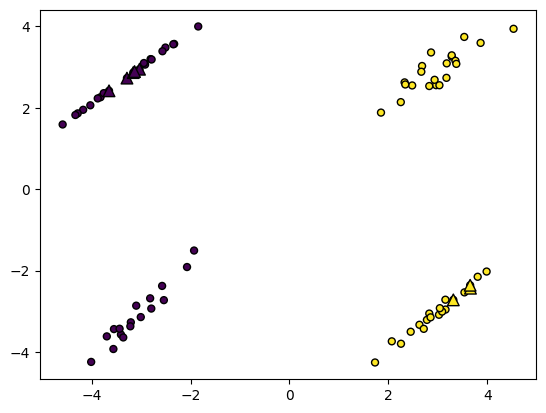

In [12]:
import matplotlib.pyplot as plt
plt.scatter(xx[:, 0], xx[:, 1], marker="o", c=yy, s=25, edgecolor="k")
plt.scatter(xx_v[:, 0], xx_v[:, 1], marker="^", c=yy_v, s=70, edgecolor="k")